Introduction to Logistic Regression


Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.
Types of Logistic Regression
Generally, logistic regression means binary logistic regression having binary target variables, but there can be two more categories of target variables that can be predicted by it. Based on those number of categories, Logistic regression can be divided into following types −

Binary or Binomial
In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

Multinomial
In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

Ordinal
In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

In [1]:
#imporing libraries
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets 

Matplotlib is building the font cache; this may take a moment.


Binary Logistic Regression model

The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function such as 𝑔 in the following relation −

hθ(x)=g(θTx)where0≤hθ≤1
Here, 𝑔 is the logistic or sigmoid function which can be given as follows −

g(z)=11+e−zwherez=θTx
To sigmoid curve can be represented with the help of following graph. We can see the values of y-axis lie between 0 and 1 and crosses the axis at 0.5.

Flow
The classes can be divided into positive or negative. The output comes under the probability of positive class if it lies between 0 and 1. For our implementation, we are interpreting the output of hypothesis function as positive if it is ≥0.5, otherwise negative.

We also need to define a loss function to measure how well the algorithm performs using the weights on functions, represented by theta as follows −

ℎ=𝑔(𝑋𝜃)

J(θ)=1m.(−yTlog(h)−(1−y)Tlog(1−h))
Now, after defining the loss function our prime goal is to minimize the loss function. It can be done with the help of fitting the weights which means by increasing or decreasing the weights. With the help of derivatives of the loss function w.r.t each weight, we would be able to know what parameters should have high weight and what should have smaller weight.

The following gradient descent equation tells us how loss would change if we modified the parameters −

δJ(θ)δθj=1mXT(g(Xθ)−y)

In [2]:
iris =datasets.load_iris()
x=iris.data[:,:2]
y=(iris.target !=0)*1

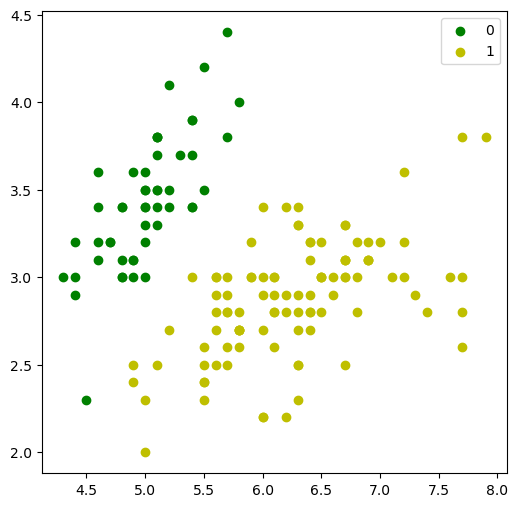

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='g', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='y', label='1')
plt.legend()

Next, we will define sigmoid function, loss function and gradient descend as follows −

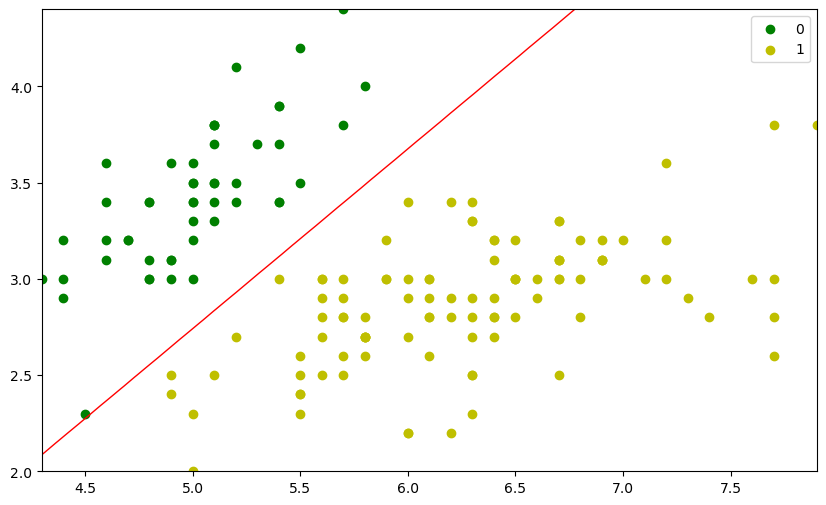

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = True
        self.theta = None

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = (1 / X.shape[0]) * np.dot(X.T, (h - y))
            self.theta -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(x, y)
preds = model.predict_prob(x)
accuracy = (preds == y).mean()

plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='g', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='y', label='1')
plt.legend()
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red')
plt.show()